# Dataset preparation for chest xray classification

In [1]:
import os

import pandas as pd

from dataset import XRayDataset

## Config vars

In [2]:
root = '.'
metadata_path = os.path.join(root, 'Chest_xray_Corona_Metadata.csv') 
dataset_path = os.path.join(root, 'Coronahack-Chest-XRay-Dataset', 'Coronahack-Chest-XRay-Dataset')

## Check distributions

In [3]:
df_metadata = pd.read_csv(metadata_path)
df_metadata = df_metadata.loc[:, ~df_metadata.columns.str.contains('^Unnamed')]

df_train = df_metadata[df_metadata['Dataset_type'] == 'TRAIN']
df_test = df_metadata[df_metadata['Dataset_type'] == 'TEST']

In [4]:
df_metadata

,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...
5905,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [5]:
print(f"Label_1 distribution: \n{df_metadata['Label'].value_counts()}")
print(f"Label_2 distribution: \n{df_metadata['Label_1_Virus_category'].value_counts()}")
print(f"Label_3 distribution: \n{df_metadata['Label_2_Virus_category'].value_counts()}")

pneumonia_count = df_metadata['Label'].value_counts()[0]
normal_count = df_metadata['Label'].value_counts()[1]
total = df_metadata['Label'].value_counts().sum()

weight_distribution = [normal_count / total, pneumonia_count / total]
print(f'weight_distribution: {weight_distribution}')

Label_1 distribution: 
Pnemonia    4334
Normal      1576
Name: Label, dtype: int64
Label_2 distribution: 
bacteria          2777
Virus             1555
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64
Label_3 distribution: 
COVID-19         58
Streptococcus     5
SARS              4
ARDS              2
Name: Label_2_Virus_category, dtype: int64
weight_distribution: [0.26666666666666666, 0.7333333333333333]


## Test custom dataset

In [6]:
train_dataset = XRayDataset(mode='train', dataset_path=dataset_path, metadata_path=metadata_path)
test_dataset = XRayDataset(mode='test', dataset_path=dataset_path, metadata_path=metadata_path)

In [7]:
img, target = train_dataset[1]

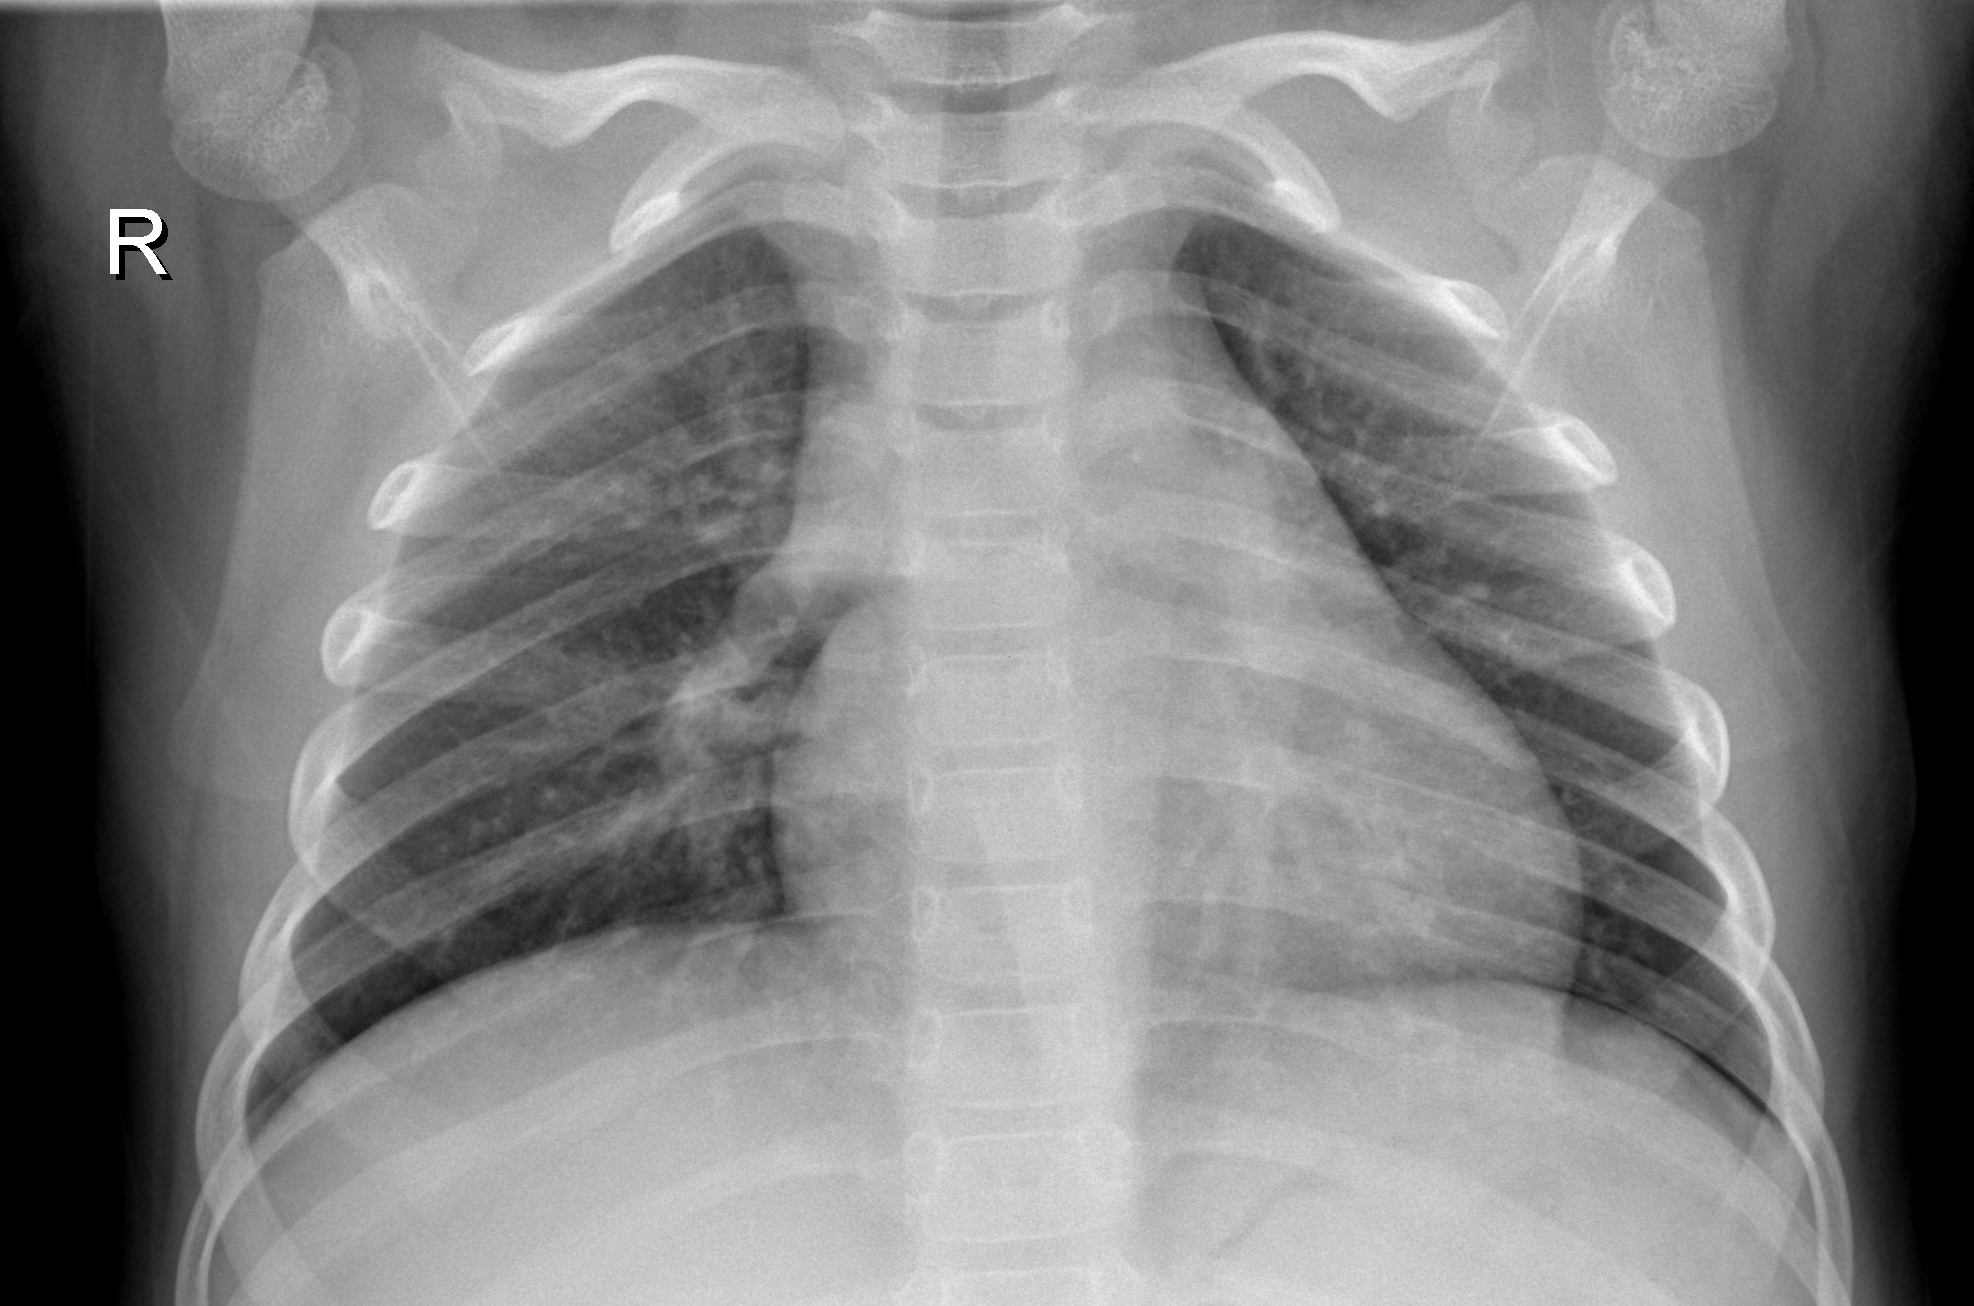

In [8]:
img

In [9]:
target

{'label_1': 0, 'image_id': tensor([1])}